In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyBEM2D as BEMpy

# Domain decomposition method (DDM)

### Step1. Setup BEM subdomains

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 16(Edge) 0(Trace)
[Mesh] Number of Nodes:48(Total) 48(Edge) 0(Trace) 0(Source)


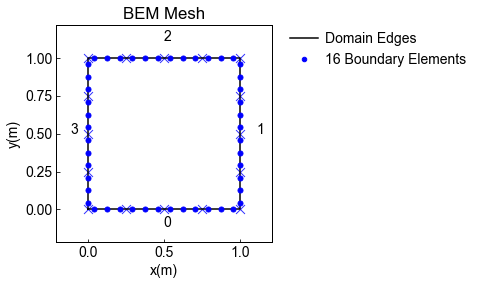

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 100)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 16(Edge) 0(Trace)
[Mesh] Number of Nodes:48(Total) 48(Edge) 0(Trace) 0(Source)


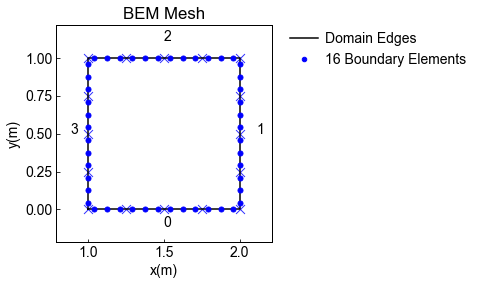

[Boundary Condition] BCs set up
[Boundary Condition] Neumann BC @ [(1, -50)]


In [107]:
#####Subdomain1########
BEM_Case1=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1.0/4.0

BEM_Case1.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case1.plot_Mesh()
#2.Set Boundary condition
#bc0=[(0,100),(3,100)]
bc0=[(3,100)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case1.print_debug()

BEM_Case1.SetProps(k=1e-3,h=0.02,miu=0.001)

#####Subdomain2########
BEM_Case2=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(1.0, 0.0), (2.0, 0.0), (2.0, 1.0), (1.0, 1.0)] #Anti-clock wise for internal domain

BEM_Case2.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case2.plot_Mesh()

#2.Set Boundary condition
#bc0=[(1,10)]
#BEM_Case2.set_BoundaryCondition(DirichletBC=bc0)
bc0=[(1,-50)]
BEM_Case2.set_BoundaryCondition(NeumannBC=bc0)
#BEM_Case2.print_debug()

BEM_Case2.SetProps(k=3e-2,h=0.01,miu=0.001)

BEMCases=[BEM_Case1,BEM_Case2]

### Step2. Setup iterative coupling solver

In [108]:
#Intersection 1
#Domain 0 <-> Domain 1
#BD 1 <-> BD 3
DomainID,BoundaryID=0,1
DomainID_connect,BoundaryID_connect=1,3
Intersect1=[DomainID,DomainID_connect,BoundaryID,BoundaryID_connect]

### Step3. Parallel Robin-Robin Algorithm

[Solution] #DOFs= 48
[Solution] #DOFs= 48
2	0.33333333333333337		alpha:	0.5
4	1.9999999999999958		alpha:	0.9999999999999996
6	38877759214179.77		alpha:	1.0000000000000016
8	0.25980769230769224		alpha:	0.516042780748663
10	0.035193405199746376		alpha:	0.33636363636363636
12	0.002067539627842884		alpha:	0.02
Converged at 13 Steps! TOL= 1e-05
Dirichelt [50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
Robin [ 8.52651283e-14 -4.26325641e-14  1.49213975e-13  1.42108547e-13
 -2.84217094e-14 -9.94759830e-14  8.52651283e-14 -2.84217094e-14
  3.55271368e-14  2.06057393e-13 -6.39488462e-14 -9.23705556e-14]


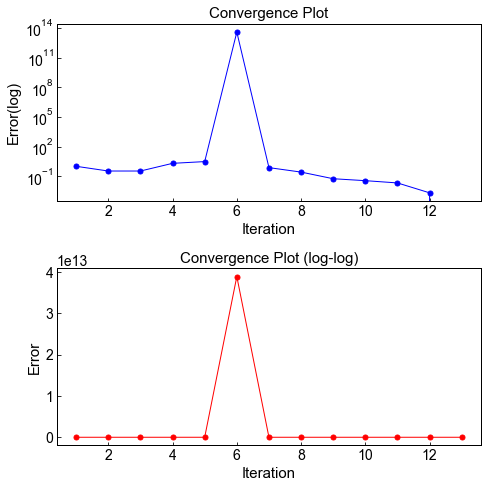

In [67]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=[Intersect1],plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-RR",max_iters=100,TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Parallel Neumann-Neumann Algorithm

[Solution] #DOFs= 48
[Solution] #DOFs= 48
1	1.0		alpha:	0.5
2	0.4927401648809261		alpha:	0.5
3	0.48433536404642813		alpha:	0.9797050300590089
4	0.33103891676147545		alpha:	1.0544265000146877
5	0.18260000365001422		alpha:	0.7486549842642511
6	0.08649697119127187		alpha:	0.4011172981313891
7	0.03733690559103897		alpha:	0.18285048927192624
8	0.015397177387168615		alpha:	0.07714530979732608
9	0.006224375428150612		alpha:	0.031477301333335025
10	0.002495593450284324		alpha:	0.01266768468911975
11	0.00099725146592207		alpha:	0.005069637185561968
12	0.00039797435797247213		alpha:	0.002024353350039202
13	0.00015873530183619893		alpha:	0.0008076219036582734
14	6.329936799153303e-05		alpha:	0.00032208845027395424
15	2.523993886761248e-05		alpha:	0.0001284341481552254
16	1.0063811600413032e-05		alpha:	5.1210764728043056e-05
17	4.0126457973830625e-06		alpha:	2.0418893376296738e-05
Converged at 17 Steps! TOL= 1e-05
Dirichelt [80.16899961 60.05609045 47.15406991 37.97334489 31.16065846 26.00274089
 

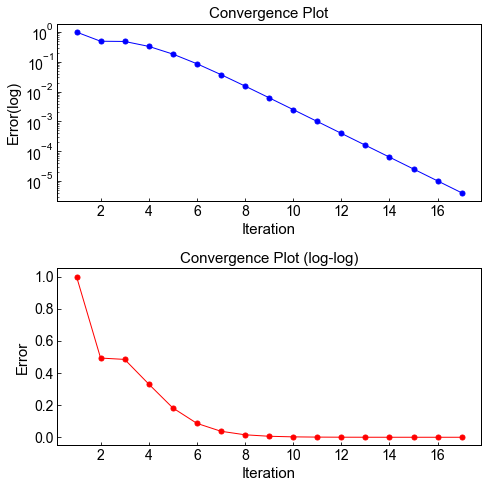

In [14]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=[Intersect1],plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-NN",max_iters=100,TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Parallel Dirichlet-Dirichlet Algorithm (winner)

[Solution] #DOFs= 48
[Solution] #DOFs= 48
2	0.4974874371859349		alpha:	0.5
4	2.5270689244273108e-11		alpha:	50.00000000001561
6	1.4735708949339051e-12		alpha:	0.10389748129377843
Converged at 6 Steps! TOL= 1e-05
Dirichelt [75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75.]
Neumann [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]


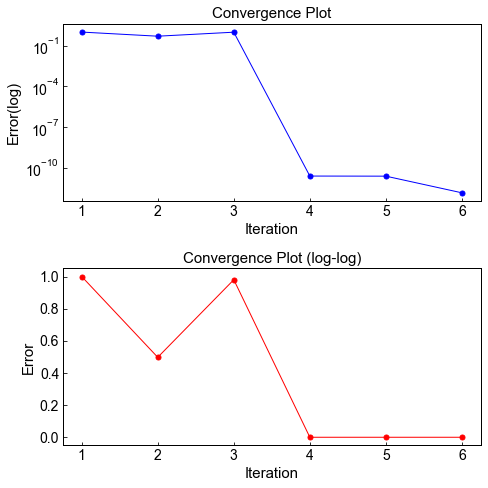

In [109]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=[Intersect1],plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-DD",max_iters=100,TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Sequential Dirichlet-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 32
Total Number of Subdomains: 2


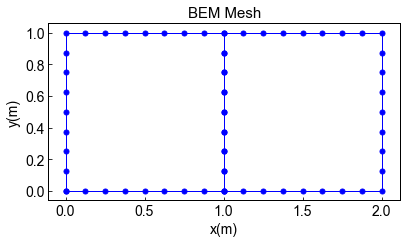

[Warnning] This method is not applicable for new input format


In [21]:
CommonEdges=[[(1.0, 0.0), (1.0, 1.0)]
            ]
Connects=[[(1,0)],  #BEM_case1 connect with BEM_case2(1) at its face 1 
          [(0,0)]] 

BEMCases=[BEM_Case1,BEM_Case2] #BEM_Case1,BEM_Case2 are coupled

BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="S-DN",TOL=1e-5,alpha=0.5,opt=1) #p-dn

### Step4. Solution Visulization & Verification

[Visulization] Plotting Solution


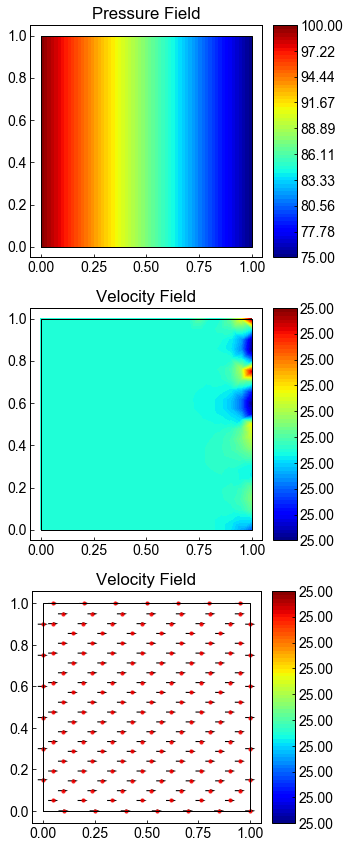

[Visulization] Plotting Solution


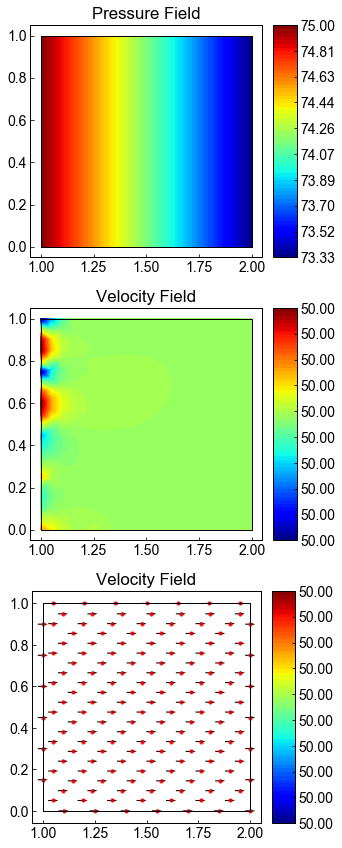

In [110]:
#Pressure and velocity contour results
PUV1=BEM_Case1.PostProcess.plot_Solution()
PUV2=BEM_Case2.PostProcess.plot_Solution()

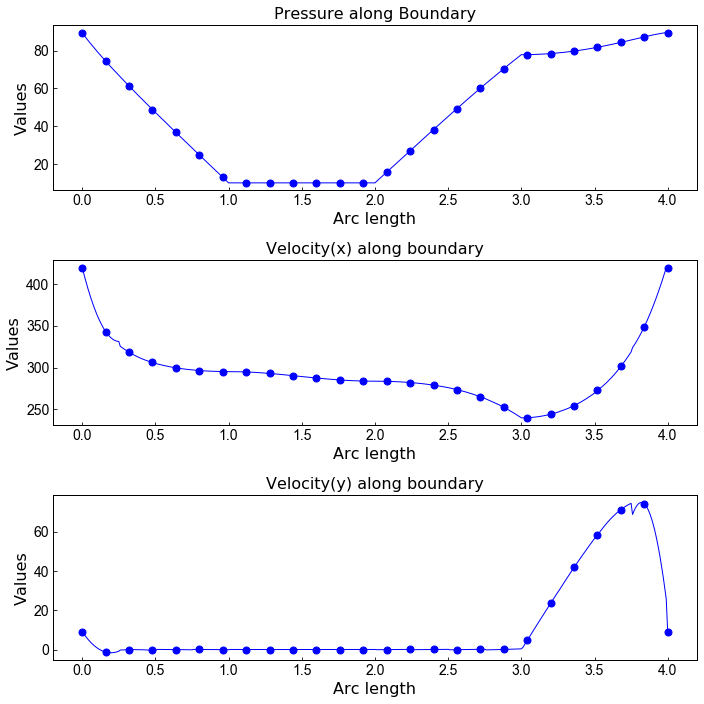

In [16]:
P=BEM_Case2.PostProcess.plot_SolutionBD()

In [ ]:
P=BEM_Case2.PostProcess.plot_SolutionBD()